In [137]:
import sys
sys.executable

'/Library/Developer/CommandLineTools/usr/bin/python3'

In [138]:
#!'/Library/Developer/CommandLineTools/usr/bin/python3' -m pip install smote_variants

In [139]:
#!'/Library/Developer/CommandLineTools/usr/bin/python3' -m pip install imblearn

In [140]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from numpy import mean
from numpy import std

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression


In [141]:
import smote_variants as sv

In [142]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [144]:
dataframe = pd.read_csv('/Users/madhuri/Desktop/MasterThesis/Part2/ClinicalData_completeCases.csv')

In [145]:
X= dataframe.iloc[:, :-1]
y=dataframe['CancerType']



In [146]:
dataframe.head()

,DiseaseType,SampleType,Gender,Race,Ethnicity,PrimaryDiagnosis,AgeAtDiagnosis,Morphology,TissueOrOrganOfOrigin,CancerType
0,TransitionalCellPapillomasAndCarcinomas,Primary Tumor,male,white,not hispanic or latino,Transitional cell carcinoma,27730,8120/3,Dome of bladder,Bladder
1,TransitionalCellPapillomasAndCarcinomas,Primary Tumor,male,white,not hispanic or latino,Transitional cell carcinoma,28106,8120/3,"Bladder, NOS",Bladder
2,TransitionalCellPapillomasAndCarcinomas,Primary Tumor,male,white,not hispanic or latino,Transitional cell carcinoma,26546,8120/3,"Bladder, NOS",Bladder
3,TransitionalCellPapillomasAndCarcinomas,Primary Tumor,male,white,not hispanic or latino,Papillary transitional cell carcinoma,16145,8130/3,"Bladder, NOS",Bladder
4,TransitionalCellPapillomasAndCarcinomas,Primary Tumor,male,white,not hispanic or latino,Transitional cell carcinoma,25576,8120/3,Lateral wall of bladder,Bladder


In [118]:
dataframe.shape

(5068, 10)

In [119]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5068 entries, 0 to 5067
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   DiseaseType            5068 non-null   object
 1   SampleType             5068 non-null   object
 2   Gender                 5068 non-null   object
 3   Race                   5068 non-null   object
 4   Ethnicity              5068 non-null   object
 5   PrimaryDiagnosis       5068 non-null   object
 6   AgeAtDiagnosis         5068 non-null   int64 
 7   Morphology             5068 non-null   object
 8   TissueOrOrganOfOrigin  5068 non-null   object
 9   CancerType             5068 non-null   object
dtypes: int64(1), object(9)
memory usage: 396.1+ KB


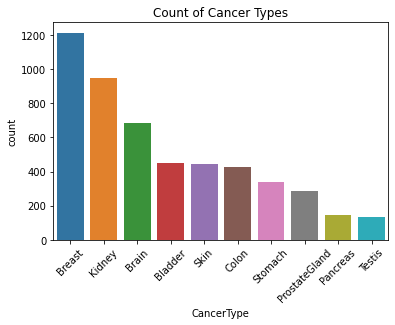

In [193]:
sns.countplot(x = 'CancerType',
              data = dataframe,
              order = dataframe['CancerType'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Count of Cancer Types")
plt.savefig('count.png')
plt.show()

In [147]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.3,random_state=10) 

In [148]:
numerical_ix= X.select_dtypes(include=['int64','float64']).columns
categorical_ix = X.select_dtypes(include=['object', 'bool']).columns


In [149]:
from sklearn.preprocessing import MinMaxScaler
#one hot encoding categorical predictors
t=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_ix), ('num', MinMaxScaler(), numerical_ix)]
col_transform=ColumnTransformer(transformers=t)
X_transform=col_transform.fit_transform(X_train)

In [123]:
#X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.3,random_state=0) 

In [124]:
X_train.shape


(3547, 9)

In [125]:
from sklearn.preprocessing import StandardScaler
#ct = ColumnTransformer([(pd.DataFrame('X_train'), StandardScaler(), ['AgeAtDiagnosis'])], remainder ='passthrough')
#ct=StandardScaler()
# c= [('num', StandardScaler(), numerical_ix)]
# col_t=ColumnTransformer(transformers=c, remainder="passthrough")
#X_t=col_t.fit_transform(X_train)
# X_train_scaled = ct.fit_transform(X_train)
# X_test_scaled = ct.transform(X_test)

In [126]:
# col_scale=['AgeAtDiagnosis']
# scaler=StandardScaler()
# X_tr=scaler.fit_transform[col_scale]

In [83]:
# scaler = preprocessing.StandardScaler().fit(X_train['AgeAtDiagnosis'])
# Age_scaled = scaler.transform(X_train['AgeAtDiagnosis'])

In [150]:

X_test=col_transform.transform(X_test)

/Users/madhuri/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


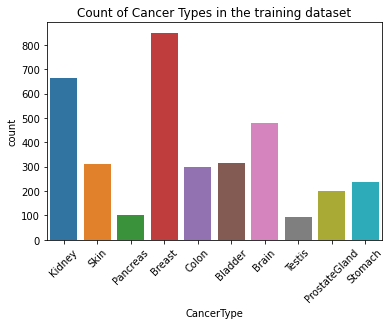

In [203]:
sns.countplot(y_train)
plt.xticks(rotation=45)
plt.title("Count of Cancer Types in the training dataset")
plt.savefig('tr_count.png')
plt.show()


In [39]:
#one hot encoding categorical predictors
# enc = OneHotEncoder(handle_unknown = 'ignore')
# enc.fit_transform(X[categorical_ix]).toarray()
# # enc.transform(train).toarray()


# enc.transform(test).toarray()

In [151]:
le = LabelEncoder()
le.fit(y_train)
y_train_enc= le.transform(y_train)
y_test_enc=le.transform(y_test)

In [152]:
# Define SMOTE-Tomek Links
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_samp, y_samp = resample.fit_resample(X_transform, y_train_enc)


/Users/madhuri/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


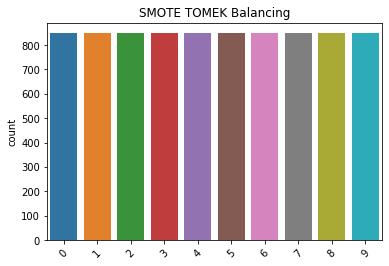

In [211]:

sns.countplot(y_samp)
plt.xticks(rotation=45)
plt.title("SMOTE TOMEK Balancing")
#plt.savefig("smt.png")
plt.show()

In [158]:
# le = LabelEncoder()
# le.fit(y_train)
# y_enc= le.transform(y_train)
# y_test=le.transform(y_test)

In [169]:
y_test

4137           Kidney
3580           Kidney
302           Bladder
3711           Kidney
134           Bladder
            ...      
1687            Brain
2016           Breast
4179    ProstateGland
2242           Breast
1422            Brain
Name: CancerType, Length: 1521, dtype: object

In [153]:
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='sag', max_iter = 200)
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)              # n_repeats=10 made no difference

In [154]:
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X_samp, y_samp, scoring='accuracy', cv=cv, n_jobs=-1)

In [155]:
#  model performance
print('Mean Accuracy: %.3f' % (mean(n_scores)))

Mean Accuracy: 1.000


In [156]:
model.fit(X_samp,y_samp)

LogisticRegression(max_iter=200, multi_class='multinomial', solver='sag')

In [157]:
y_pred=model.predict(X_test)

In [158]:
y_pred

array([4, 1, 2, ..., 3, 7, 4])

In [159]:
from sklearn.metrics import confusion_matrix

In [160]:
confusion_matrix(y_test_enc,y_pred)

array([[134,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 206,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 364,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 128,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 284,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  43,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  86,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 134,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 102,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  40]])

In [161]:
from sklearn import metrics
from sklearn.metrics import *

In [162]:
print(metrics.classification_report(y_test_enc, y_pred, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000       134
           1      1.000     1.000     1.000       206
           2      1.000     1.000     1.000       364
           3      1.000     1.000     1.000       128
           4      1.000     1.000     1.000       284
           5      1.000     1.000     1.000        43
           6      1.000     1.000     1.000        86
           7      1.000     1.000     1.000       134
           8      1.000     1.000     1.000       102
           9      1.000     1.000     1.000        40

    accuracy                          1.000      1521
   macro avg      1.000     1.000     1.000      1521
weighted avg      1.000     1.000     1.000      1521



In [163]:
f1_score(y_test_enc, y_pred, average='macro')

1.0

In [164]:
metrics.accuracy_score(y_test_enc,y_pred)*100

100.0

In [165]:
#probability score
y_score=model.predict_proba(X_test)

In [100]:
# roc curve
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.preprocessing import label_binarize

import matplotlib.pyplot as plt
Y = label_binarize(y, classes=[0,1, 2, 3,4,5,6,7,8,9])
fpr = dict()
tpr = dict()

for i in range(10):   #10 classes
    fpr[i], tpr[i], _ = roc_curve(y_test_enc[i],
                                  y_score[i])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))


             
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

TypeError: Singleton array 3 cannot be considered a valid collection.